# Unsupervised Learning Project 6 - Customer Segmentation
## Paige Singleton
## October 2022
## Problem Statement
### "Identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers."

### Data Dictionary
- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

### Questions to be answered
1) How can we improve market penetration?
2) How should we personalize our marketing campaigns to new customers? to existing customers?
3) What steps should we take to upgrade the service delivery models, to "ensure that customer queries are resolved faster?'


In [1]:
# From MLS Engineering College Great Learning Jupyter notebook file
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
data = pd.read_csv("Credit Card Customer Data.csv")

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(660, 7)

## Exploratory Data Analysis
Data background and contents - Univariate analysis - Bivariate analysis - Insights based on EDA

See above for Data Background and contents, problem statement and questions to be answered


### Univariate Analysis

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [8]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
# function to create labeled barplots (code from Great Learning Resource - MLS - Engineering colleges Case Study)


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [10]:
list(data.columns)

['Sl_No',
 'Customer Key',
 'Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

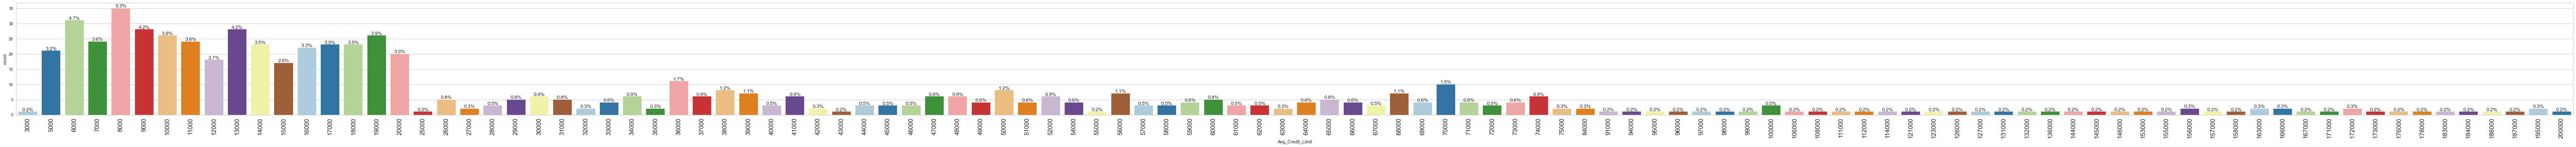

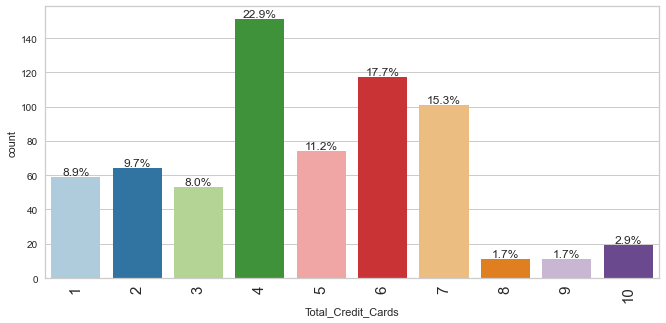

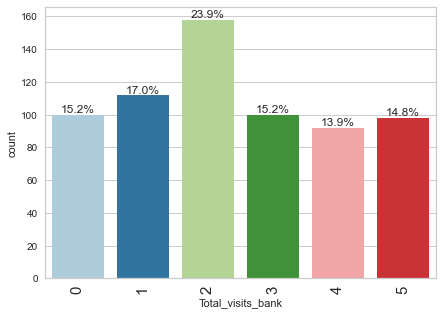

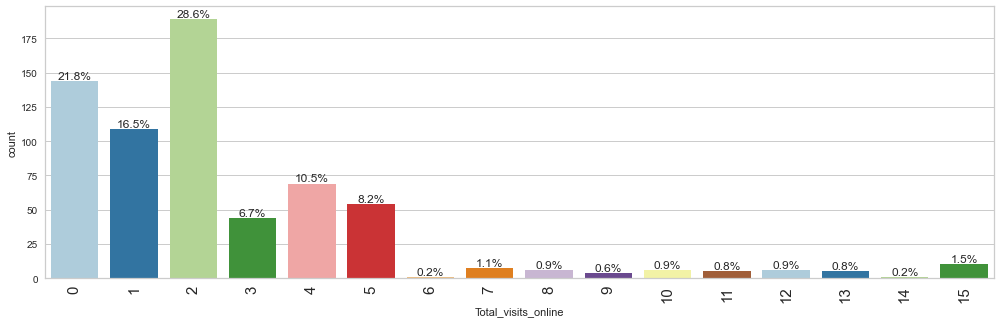

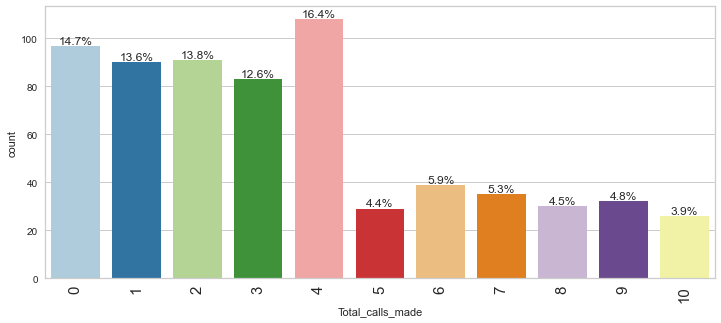

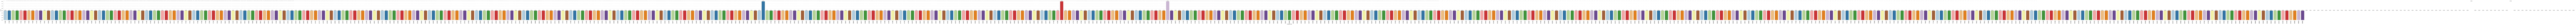

In [11]:
# Designate informative columns, all numberical','
info_col = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made', 'Customer Key']
for col in info_col:
    labeled_barplot(data, col, perc=True)

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Count'>

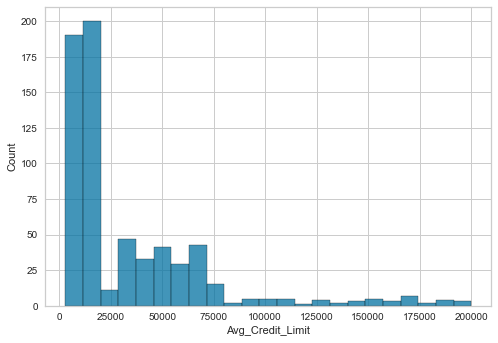

In [12]:
#Data Distribution of Average Credit limit
sns.histplot(data=data, x='Avg_Credit_Limit')

In [13]:
# From Anime Rating Prediction case study, function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

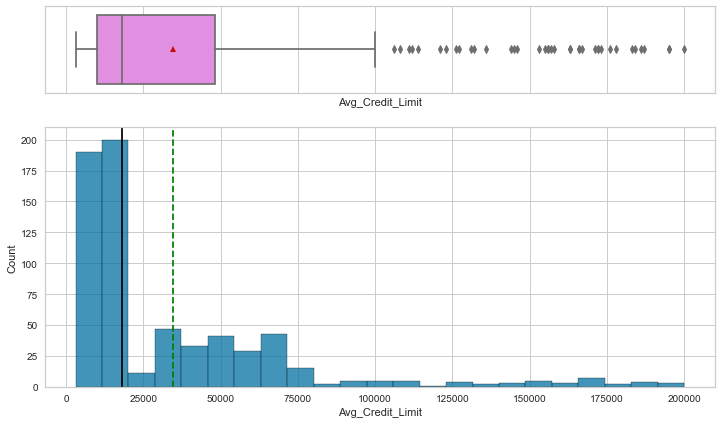

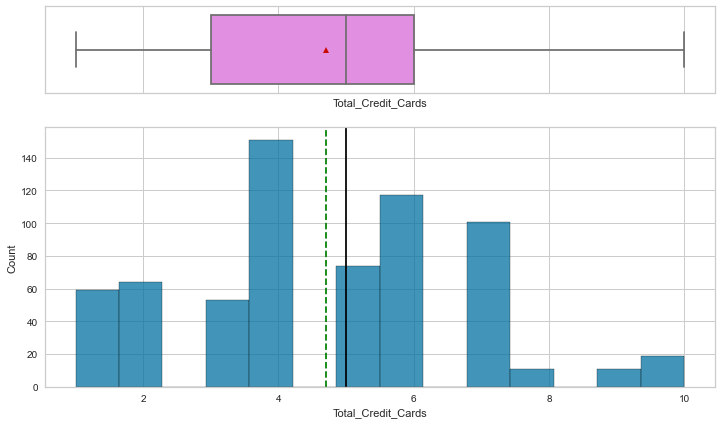

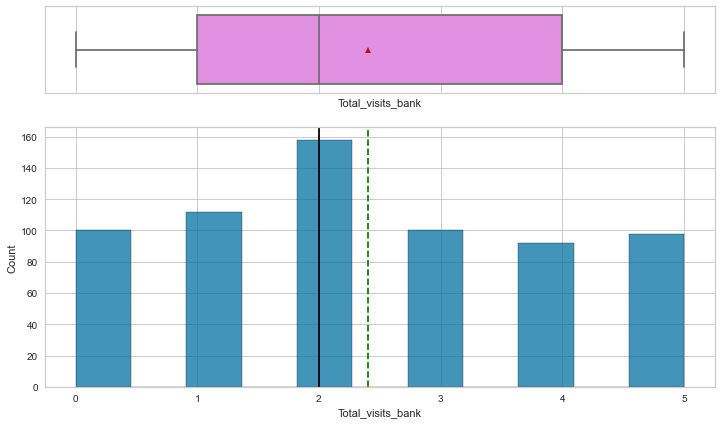

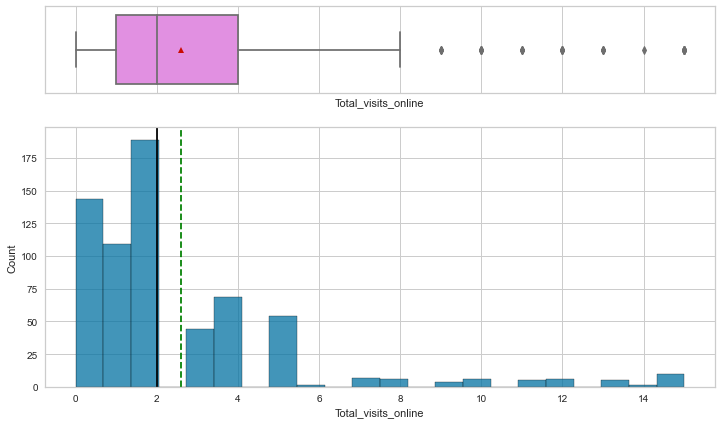

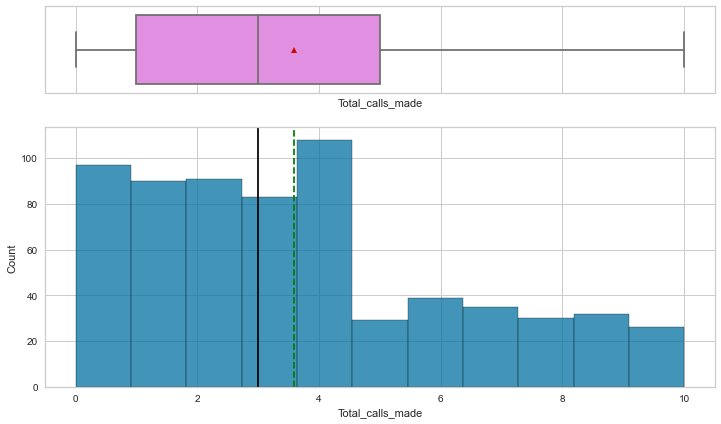

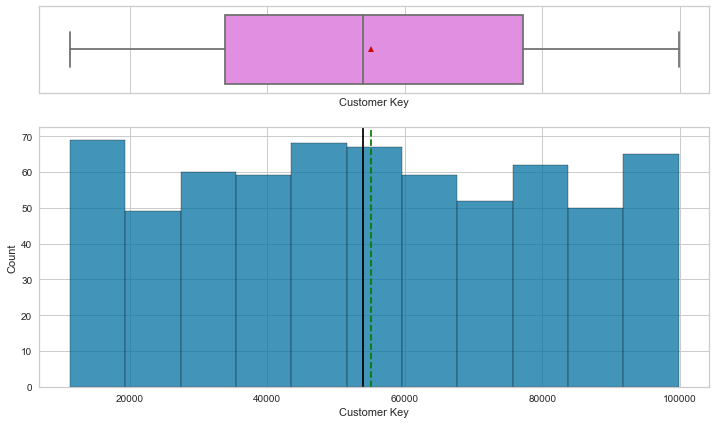

In [14]:
for col in info_col:
    histogram_boxplot(data, col)

### Bivariate Analysis


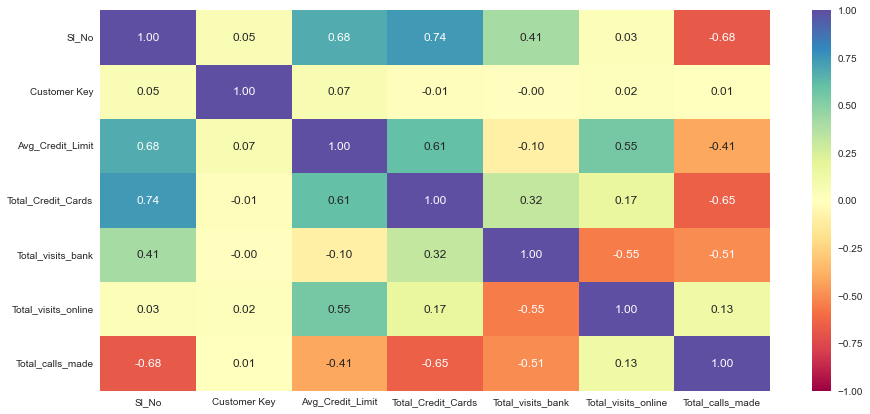

In [15]:
# Corrlation Matrix (using code from MLS - Engineering colleges case study)
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

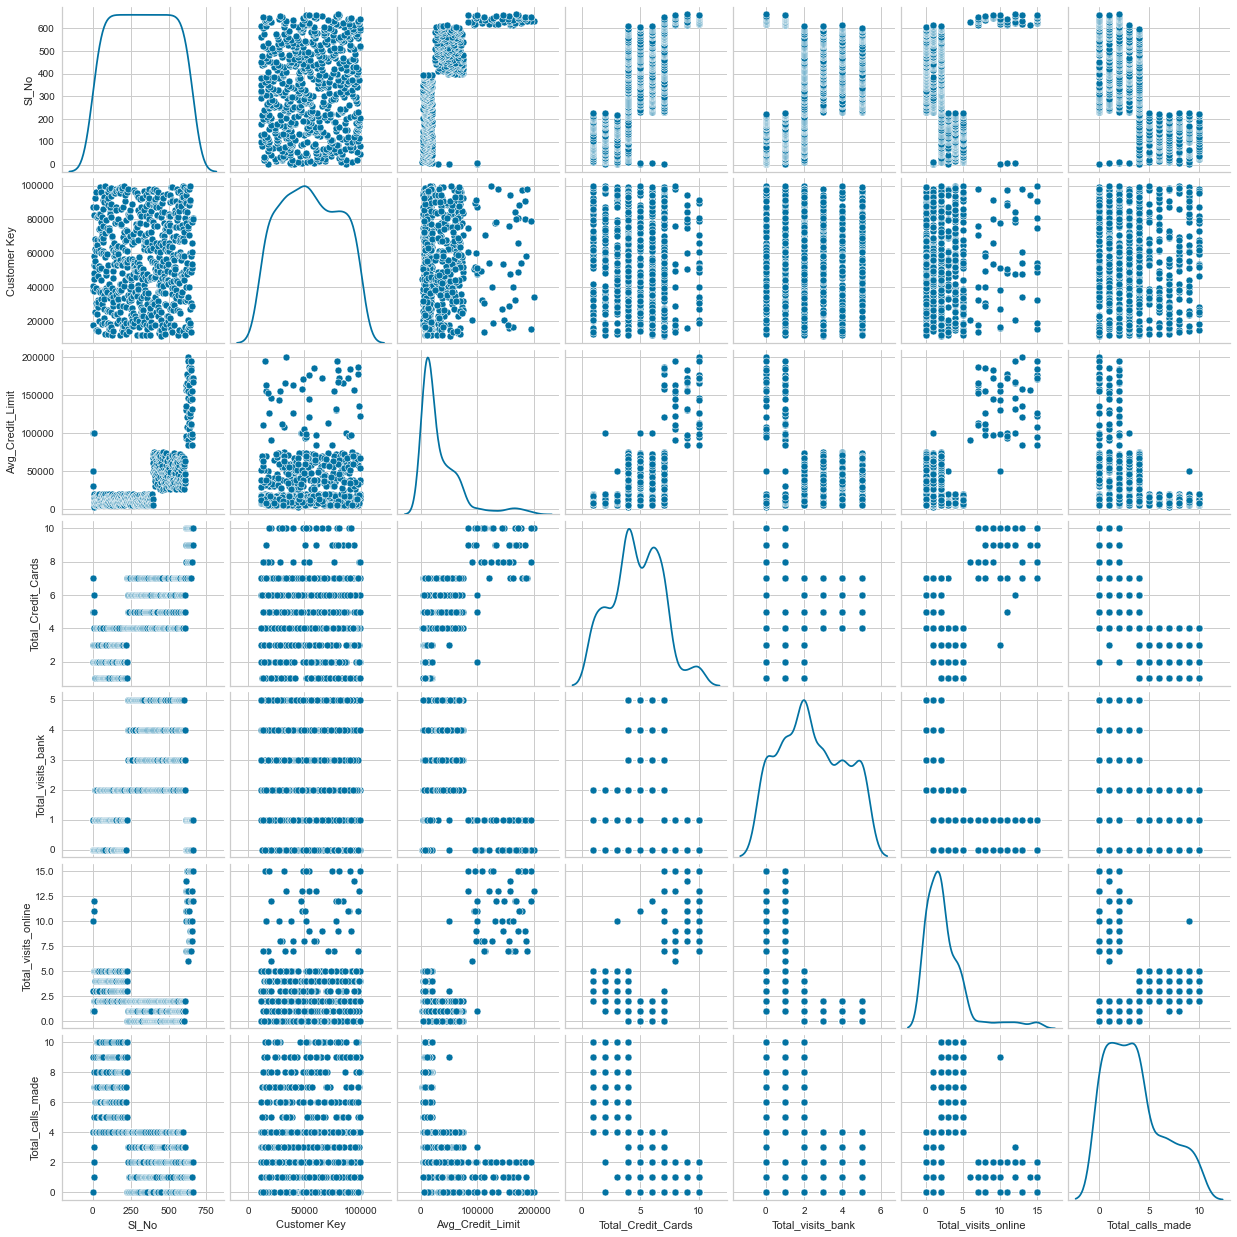

In [16]:
sns.pairplot(data , diag_kind = 'kde',diag_kws=dict(fill=False))
plt.show()

### EDA Insights

##### Sanity Check 
- the data set has 660 rows and 7 columns
- SL_No is seriel and therefore non - informative; should be dropped from the dataset
- there are not duplicates (for the entire set)
- there are no nulls in the data set

##### EDA Insights 
- Sl_No: Primary key of the records - non informative; should be dropped
- Customer Key: Customer identification number
    - does not appear to be seriel
    - mean and mean are similar
    - might be some duplicates 
    - explore duplicates
    - higher customer keys appear to be associated with higher credit limits and total visitis online
    - Question: are customer numbers assigned based on other criteria and therefore informative?
    - From the FAQ's: "The 'Customer Key' is a unique ID given to each customer in the database. The duplicate values might correspond to customer profile changes, and as such, there is no need to delete these records as these are actual occurrences at some point in the time. The column can be dropped during the analysis." therefore, frop this column.
- Average Credit Limit: Average credit limit of each customer for all credit cards
    - disparity between mean and median therefore data is skewed right
    - outliers on the high end of the data
    - is correlated to other variables: Total credit cards (.61); Total visits online (0.55); and Total calls made (-.41) therefore consider the impact of multi-collinearity   
- Total credit cards: Total number of credit cards possessed by the customer
    - values are integer values from 1 to 10, inclusive
    - is correlated to other variables: Verage Credit Limit (.61); Total visits bank (0.32); and Total calls made (-.65) therefore consider the impact of multi-collinearity
    - distribution is not skewed
- Total visits bank: Total number of visits that customer made (yearly) personally to the bank
    - values Range from 0 to 5, inclusive
    - Mode is 2; otherewise the data is faily uniform
    - appear to be no outliers
    - is correlated to other variables: Total credit cards (.32); Total visits online (-0.55); and Total calls made (-.51) therefore consider the impact of multi-collinearity 
- Total visits online: Total number of visits or online logins made by the customer (yearly)
    - Range from 0 to 15, inclusive, with median of 2
    - Outliers are present (high end)
    - data is skewed right
    - is correlated to other variables: Total visits bank (-0.55); and Average credit limit (0.55) therefore consider the impact of multi-collinearity 
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)
    - Range from 0 to 10, inclusive, with median of 3
    - data is slightly skewed
    - no outliers
    - is correlated to other variables: Total credit cards (-.65); Total visits bank (-0.51); and Average Credit Limit(-.41) therefore consider the impact of multi-collinearity 

In [17]:
#Before pre-processing, make a copy of the dataset
data2 = data.copy()


## Data Preprocessing
Prepare the data for analysis - Feature engineering - Missing value treatment - Outlier treatment - Duplicate observations check

In [18]:
# dropping the serial no. and customer Key  columns as it does not provide any information
data.drop(["Sl_No","Customer Key"], axis=1, inplace=True)

### Feature Analysis

### Missing Value Treatment

In [19]:
# checking for missing values
data.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

##### There are no missing values therefore missing value treatment is not appicable

### Outlier Treatment (Using code from Great Learning resources on Outlier treatment)

#### Average Credit Limit

In [20]:
#Per EDA, check for outliers on "Avrage Credit limit" feature 
quartiles = np.quantile(data['Avg_Credit_Limit'][data['Avg_Credit_Limit'].notnull()], [.25, .75])
ACL_power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, ACL_4*IQR = {ACL_power_4iqr}')
outlier_powers = data.loc[np.abs(data['Avg_Credit_Limit'] - data['Avg_Credit_Limit'].median()) > ACL_power_4iqr, 'Avg_Credit_Limit']
outlier_powers

Q1 = 10000.0, Q3 = 48000.0, ACL_4*IQR = 152000.0


622    176000
624    178000
630    200000
631    195000
632    187000
637    173000
639    184000
645    171000
646    186000
647    183000
650    195000
654    172000
658    172000
Name: Avg_Credit_Limit, dtype: int64

In [21]:
#Per EDA, check for outliers on "Total_visits_online" feature 
quartiles = np.quantile(data['Total_visits_online'][data['Total_visits_online'].notnull()], [.25, .75])
TVO_power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, TVO_power_4iqr = {TVO_power_4iqr}')
outlier_powers = data.loc[np.abs(data['Total_visits_online'] - data['Total_visits_online'].median()) > TVO_power_4iqr, 'Total_visits_online']
outlier_powers 

Q1 = 1.0, Q3 = 4.0, TVO_power_4iqr = 12.0


620    15
622    15
628    15
631    15
639    15
640    15
644    15
645    15
653    15
658    15
Name: Total_visits_online, dtype: int64

In [22]:
data_RO = pd.DataFrame(data, columns = data.columns)

In [23]:
data_RO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [24]:
#Create a dataset with outliers replaced with Q3 (feature:Average Credit Limit)
#Replace the outliers with  Q3 for outliers above the median
data_RO['Avg_Credit_Limit'].mask(data_RO['Avg_Credit_Limit'] > ACL_power_4iqr, data_RO['Avg_Credit_Limit'].quantile(.75), inplace=True)

In [25]:
#Replace the outliers with  Q3 for outliers above the median for data_RO.Total_visits_online
data_RO['Total_visits_online'].mask(data_RO['Total_visits_online'] > TVO_power_4iqr, data_RO['Total_visits_online'].quantile(.75), inplace=True)

### Duplicate Observation Check

In [26]:
#Check for duplicates again after removing the Seriel number and customer key columns

data.duplicated().sum()

13

In [27]:
#Remove duplicates (per code in Product segmentation notebook)
data = data[(~data.duplicated())].copy()

In [28]:
data_RO.duplicated().sum()

13

In [29]:
#Remove duplicates (per code in Product segmentation notebook)
data_RO = data_RO[(~data_RO.duplicated())].copy()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     647 non-null    int64
 1   Total_Credit_Cards   647 non-null    int64
 2   Total_visits_bank    647 non-null    int64
 3   Total_visits_online  647 non-null    int64
 4   Total_calls_made     647 non-null    int64
dtypes: int64(5)
memory usage: 30.3 KB


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     647 non-null    int64
 1   Total_Credit_Cards   647 non-null    int64
 2   Total_visits_bank    647 non-null    int64
 3   Total_visits_online  647 non-null    int64
 4   Total_calls_made     647 non-null    int64
dtypes: int64(5)
memory usage: 30.3 KB


### Feature Scaling (per code in Product segmentation workbook)

In [32]:
num_col = ['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']
# scaling the dataset before clustering for data
scaler = StandardScaler()
data_subset = data[num_col].copy()
data_subset_scaled = scaler.fit_transform(data_subset)

In [33]:
# scaling the dataset before clustering for data_RO
scaler = StandardScaler()
data_RO_subset = data[num_col].copy()
data_RO_subset_scaled = scaler.fit_transform(data_RO_subset)

## Applying K-means Clustering
Apply K-means Clustering - Plot the Elbow curve - Check Silhouette Scores - Figure out appropriate number of clusters - Cluster Profiling

### Apply K-Means Clustering

### Plot Elbow Curve

### Check Sihouette Scores

### Determine Number of clusters

### Cluster Profile

## Applying Hierarchical Clustering
Apply Hierarchical clustering with different linkage methods - Plot dendrograms for each linkage method - Check cophenetic correlation for each linkage method - Figure out appropriate number of clusters - Cluster Profiling

### Apply Hierarchical clustering with different linkage methods

### Plot dendrograms for each linkage method

### Check cophenetic correlation for each linkage method

### Figure out appropriate number of clusters

### Cluster Profile

## K-means vs Hierarchical Clustering
Compare clusters obtained from K-means and Hierarchical clustering techniques

## Actionable Insights and Recommendations
Conclude with the key takeaways for the business - What would be your recommendations to the business?

In [34]:
# box plots for all informative variables
